In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv("/Users/henryasiamah/Desktop/work/topic_modeling_table.csv")
df1.head()

,Unnamed: 0,Date,Source,Country/Organization,TM_corpus,TM_corpus_tokenized,Topic,Topic_Name,Month,Year
0,0,2024-06-07,BBC,UK,many people cross channel small boat many clai...,"['many', 'people', 'cross', 'channel', 'small'...",4,Government Policies and Detention,2024-06,2024
1,1,2024-06-07,BBC,UK,right eye europe vote surge ditch german party...,"['right', 'eye', 'europe', 'vote', 'surge', 'd...",2,Geopolitics and Border Control,2024-06,2024
2,2,2024-06-07,BBC,UK,greek court throw shipwreck trial nine court g...,"['greek', 'court', 'throw', 'shipwreck', 'tria...",0,Maritime Migration and Human Stories,2024-06,2024
3,3,2024-06-07,BBC,UK,cross channel consecutive small boat crossed c...,"['cross', 'channel', 'consecutive', 'small', '...",4,Government Policies and Detention,2024-06,2024
4,4,2024-06-07,BBC,UK,people arrive small boat total people detected...,"['people', 'arrive', 'small', 'boat', 'total',...",4,Government Policies and Detention,2024-06,2024


In [3]:
df1.shape

(5282, 10)

In [4]:
df2 = pd.read_csv("/Users/henryasiamah/Desktop/work/sentiment_analysis_results_with preprocessing.csv")
df2.head()

,Date,Headline,Source,Country/Organization,Extracted_Content,compound_score,positive_score,negative_score,neutral_score,sentiment_category
0,2024-06-07,www.bbc.com,BBC,UK,The UK government wants to send some asylum se...,0.0772,0.091,0.000,0.909,Positive
1,2024-06-07,www.bbc.com,BBC,UK,The International Organization for Migration e...,-0.5574,0.000,0.310,0.690,Negative
2,2024-06-07,www.bbc.com,BBC,UK,"On 6 June, around 80 migrants, including at le...",0.0258,0.193,0.186,0.621,Neutral
3,2024-06-07,www.bbc.com,BBC,UK,"However, numbers rose again throughout the 201...",0.0772,0.178,0.000,0.822,Positive
4,2024-06-07,www.bbc.com,BBC,UK,Where do UK asylum seekers come from?,0.0000,0.000,0.000,1.000,Neutral


In [5]:
df2.shape

(42780, 10)

In [6]:
# Merge the tables on the relevant columns
merged_df = pd.merge(df1, df2, on=['Date', 'Source', 'Country/Organization'], how='inner')

In [7]:
merged_df.head()

,Unnamed: 0,Date,Source,Country/Organization,TM_corpus,TM_corpus_tokenized,Topic,Topic_Name,Month,Year,Headline,Extracted_Content,compound_score,positive_score,negative_score,neutral_score,sentiment_category
0,0,2024-06-07,BBC,UK,many people cross channel small boat many clai...,"['many', 'people', 'cross', 'channel', 'small'...",4,Government Policies and Detention,2024-06,2024,www.bbc.com,The UK government wants to send some asylum se...,0.0772,0.091,0.000,0.909,Positive
1,0,2024-06-07,BBC,UK,many people cross channel small boat many clai...,"['many', 'people', 'cross', 'channel', 'small'...",4,Government Policies and Detention,2024-06,2024,www.bbc.com,The International Organization for Migration e...,-0.5574,0.000,0.310,0.690,Negative
2,0,2024-06-07,BBC,UK,many people cross channel small boat many clai...,"['many', 'people', 'cross', 'channel', 'small'...",4,Government Policies and Detention,2024-06,2024,www.bbc.com,"On 6 June, around 80 migrants, including at le...",0.0258,0.193,0.186,0.621,Neutral
3,0,2024-06-07,BBC,UK,many people cross channel small boat many clai...,"['many', 'people', 'cross', 'channel', 'small'...",4,Government Policies and Detention,2024-06,2024,www.bbc.com,"However, numbers rose again throughout the 201...",0.0772,0.178,0.000,0.822,Positive
4,0,2024-06-07,BBC,UK,many people cross channel small boat many clai...,"['many', 'people', 'cross', 'channel', 'small'...",4,Government Policies and Detention,2024-06,2024,www.bbc.com,Where do UK asylum seekers come from?,0.0000,0.000,0.000,1.000,Neutral


In [8]:
# merged_df.to_csv("/Users/henryasiamah/Desktop/work/megred_TM_senti_table.csv")

In [9]:
merged_df.shape

(3071214, 17)

In [10]:
# Group by Topic_Name and sentiment_category
topic_sentiment = merged_df.groupby(['Topic_Name', 'sentiment_category']).size().reset_index(name='count')

In [11]:
topic_sentiment.head()

,Topic_Name,sentiment_category,count
0,Geopolitics and Border Control,Negative,237667
1,Geopolitics and Border Control,Neutral,143799
2,Geopolitics and Border Control,Positive,244023
3,Government Policies and Detention,Negative,256025
4,Government Policies and Detention,Neutral,126063


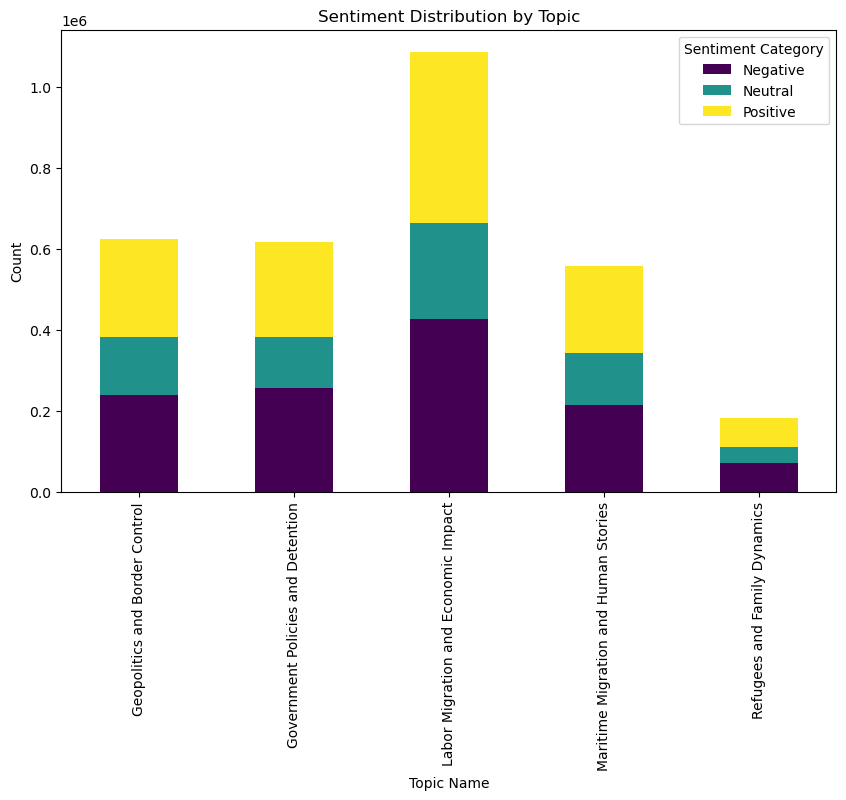

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the data for easier plotting
pivot_table = topic_sentiment.pivot(index='Topic_Name', columns='sentiment_category', values='count').fillna(0)

# Plot a stacked bar chart
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Sentiment Distribution by Topic')
plt.ylabel('Count')
plt.xlabel('Topic Name')
plt.legend(title='Sentiment Category')
plt.savefig("/Users/henryasiamah/Desktop/Visuals/TM_senti_bargraph")
plt.show()
plt.close()

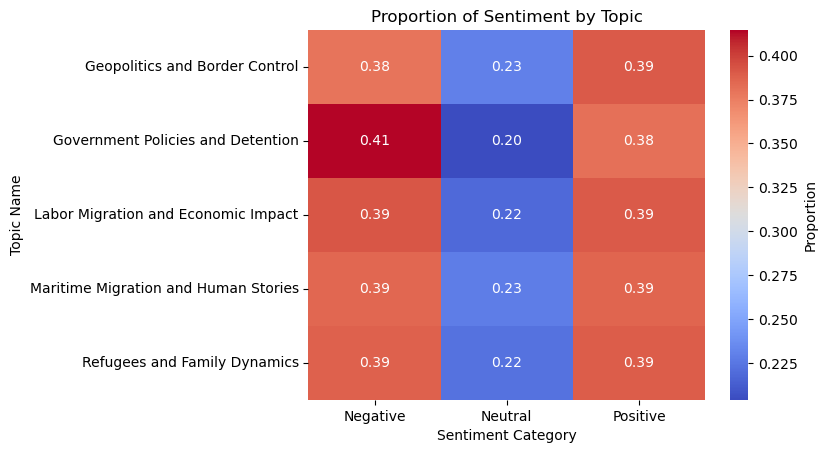

In [13]:
# Normalize counts to show proportions
pivot_normalized = pivot_table.div(pivot_table.sum(axis=1), axis=0)

# Plot the heatmap
sns.heatmap(pivot_normalized, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Proportion'})
plt.title('Proportion of Sentiment by Topic')
plt.ylabel('Topic Name')
plt.xlabel('Sentiment Category')
plt.savefig("/Users/henryasiamah/Desktop/Visuals/TM_senti_Heatmap")
plt.show()
plt.close()

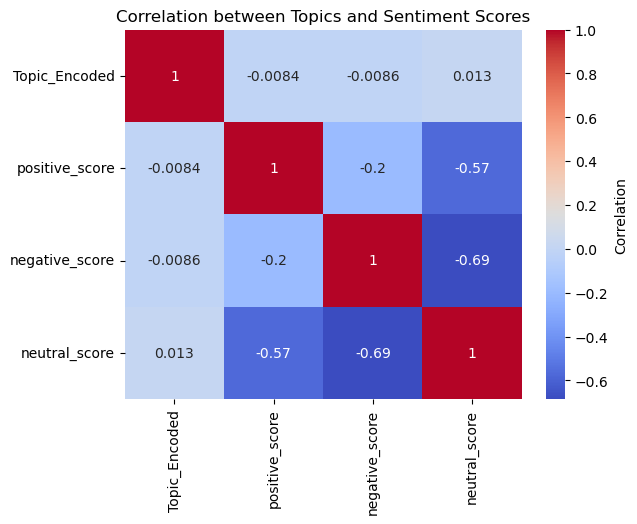

In [14]:
from sklearn.preprocessing import LabelEncoder

# Encode Topic_Name as numbers
encoder = LabelEncoder()
merged_df['Topic_Encoded'] = encoder.fit_transform(merged_df['Topic_Name'])

# Calculate correlations
correlation_matrix = merged_df[['Topic_Encoded', 'positive_score', 'negative_score', 'neutral_score']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar_kws={'label': 'Correlation'})
plt.title('Correlation between Topics and Sentiment Scores')
plt.savefig("/Users/henryasiamah/Desktop/Visuals/TM_sentScores_correlation")
plt.show()
plt.close()

### Regression

## Linear Regression (Sentiment Scores as Target)

If you want to predict compound_score, positive_score, negative_score, or neutral_score:

In [15]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# One-hot encode Topic_Name for linear/logistic regression
onehot_encoder = OneHotEncoder(sparse=False)
topic_onehot = onehot_encoder.fit_transform(merged_df[['Topic_Name']])

# Add one-hot encoded columns to the dataframe
topic_onehot_df = pd.DataFrame(topic_onehot, columns=onehot_encoder.get_feature_names_out(['Topic_Name']))
merged_df = pd.concat([merged_df, topic_onehot_df], axis=1)

/Users/henryasiamah/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define features (topics) and target (e.g., compound_score)
X = topic_onehot_df
y = merged_df['compound_score']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = reg.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 0.2077306142898316
R² Score: 0.0003119930512358593


### Logistic Regression (Sentiment Category as Target)

If you want to predict sentiment_category (positive, negative, neutral):

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Encode sentiment_category as numerical labels
label_encoder = LabelEncoder()
merged_df['sentiment_category_encoded'] = label_encoder.fit_transform(merged_df['sentiment_category'])

# Define features (topics) and target (sentiment_category_encoded)
X = topic_onehot_df
y = merged_df['sentiment_category_encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit logistic regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

/Users/henryasiamah/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/henryasiamah/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/henryasiamah/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

              precision    recall  f1-score   support

    Negative       0.40      0.57      0.47    241287
     Neutral       0.00      0.00      0.00    135385
    Positive       0.39      0.44      0.41    237571

    accuracy                           0.39    614243
   macro avg       0.26      0.34      0.29    614243
weighted avg       0.31      0.39      0.34    614243

Confusion Matrix:
 [[136466      0 104821]
 [ 72921      0  62464]
 [132206      0 105365]]


## Random Forest

For more robust modeling, use Random Forest for feature importance and predictive power:

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Feature importance
importances = rf.feature_importances_
important_topics = pd.DataFrame({'Topic': topic_onehot_df.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(important_topics.head(10))

                                             Topic  Importance
1     Topic_Name_Government Policies and Detention    0.599810
0        Topic_Name_Geopolitics and Border Control    0.188266
3  Topic_Name_Maritime Migration and Human Stories    0.102307
2   Topic_Name_Labor Migration and Economic Impact    0.088529
4          Topic_Name_Refugees and Family Dynamics    0.021088


In [19]:
merged_df.head()

,Unnamed: 0,Date,Source,Country/Organization,TM_corpus,TM_corpus_tokenized,Topic,Topic_Name,Month,Year,...,negative_score,neutral_score,sentiment_category,Topic_Encoded,Topic_Name_Geopolitics and Border Control,Topic_Name_Government Policies and Detention,Topic_Name_Labor Migration and Economic Impact,Topic_Name_Maritime Migration and Human Stories,Topic_Name_Refugees and Family Dynamics,sentiment_category_encoded
0,0,2024-06-07,BBC,UK,many people cross channel small boat many clai...,"['many', 'people', 'cross', 'channel', 'small'...",4,Government Policies and Detention,2024-06,2024,...,0.000,0.909,Positive,1,0.0,1.0,0.0,0.0,0.0,2
1,0,2024-06-07,BBC,UK,many people cross channel small boat many clai...,"['many', 'people', 'cross', 'channel', 'small'...",4,Government Policies and Detention,2024-06,2024,...,0.310,0.690,Negative,1,0.0,1.0,0.0,0.0,0.0,0
2,0,2024-06-07,BBC,UK,many people cross channel small boat many clai...,"['many', 'people', 'cross', 'channel', 'small'...",4,Government Policies and Detention,2024-06,2024,...,0.186,0.621,Neutral,1,0.0,1.0,0.0,0.0,0.0,1
3,0,2024-06-07,BBC,UK,many people cross channel small boat many clai...,"['many', 'people', 'cross', 'channel', 'small'...",4,Government Policies and Detention,2024-06,2024,...,0.000,0.822,Positive,1,0.0,1.0,0.0,0.0,0.0,2
4,0,2024-06-07,BBC,UK,many people cross channel small boat many clai...,"['many', 'people', 'cross', 'channel', 'small'...",4,Government Policies and Detention,2024-06,2024,...,0.000,1.000,Neutral,1,0.0,1.0,0.0,0.0,0.0,1


In [20]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(merged_df['Topic_Name'], merged_df['sentiment_category'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square Statistic: 2375.7904010436932
P-value: 0.0


In [21]:
merged_df.columns

Index(['Unnamed: 0', 'Date', 'Source', 'Country/Organization', 'TM_corpus',
       'TM_corpus_tokenized', 'Topic', 'Topic_Name', 'Month', 'Year',
       'Headline', 'Extracted_Content', 'compound_score', 'positive_score',
       'negative_score', 'neutral_score', 'sentiment_category',
       'Topic_Encoded', 'Topic_Name_Geopolitics and Border Control',
       'Topic_Name_Government Policies and Detention',
       'Topic_Name_Labor Migration and Economic Impact',
       'Topic_Name_Maritime Migration and Human Stories',
       'Topic_Name_Refugees and Family Dynamics',
       'sentiment_category_encoded'],
      dtype='object')

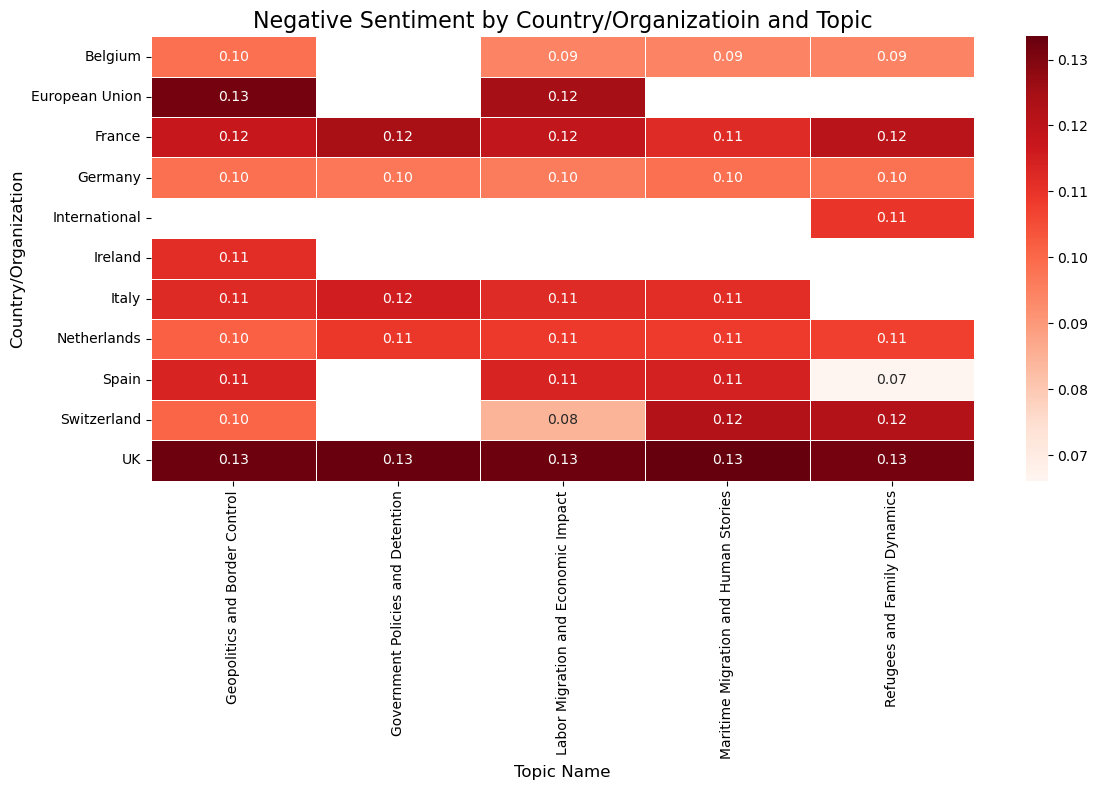

In [22]:
# Group by Country/Organization and Topic_Name, calculate mean sentiment scores
geo_analysis = merged_df.groupby(['Country/Organization', 'Topic_Name']).agg({
    'negative_score': 'mean',
    'positive_score': 'mean',
    'neutral_score': 'mean'
}).reset_index()

# Pivot the data for heatmap plotting
geo_pivot = geo_analysis.pivot_table(
    index='Country/Organization', columns='Topic_Name', values='negative_score'
)

# Plot heatmap for negative sentiment across regions and topics
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(geo_pivot, annot=True, cmap="Reds", fmt=".2f", linewidths=0.5)
plt.title("Negative Sentiment by Country/Organizatioin and Topic", fontsize=16)
plt.xlabel("Topic Name", fontsize=12)
plt.ylabel("Country/Organization", fontsize=12)
plt.tight_layout()
plt.savefig("/Users/henryasiamah/Desktop/Visuals/TM_sentScores_country_organization")
plt.show()
plt.close()

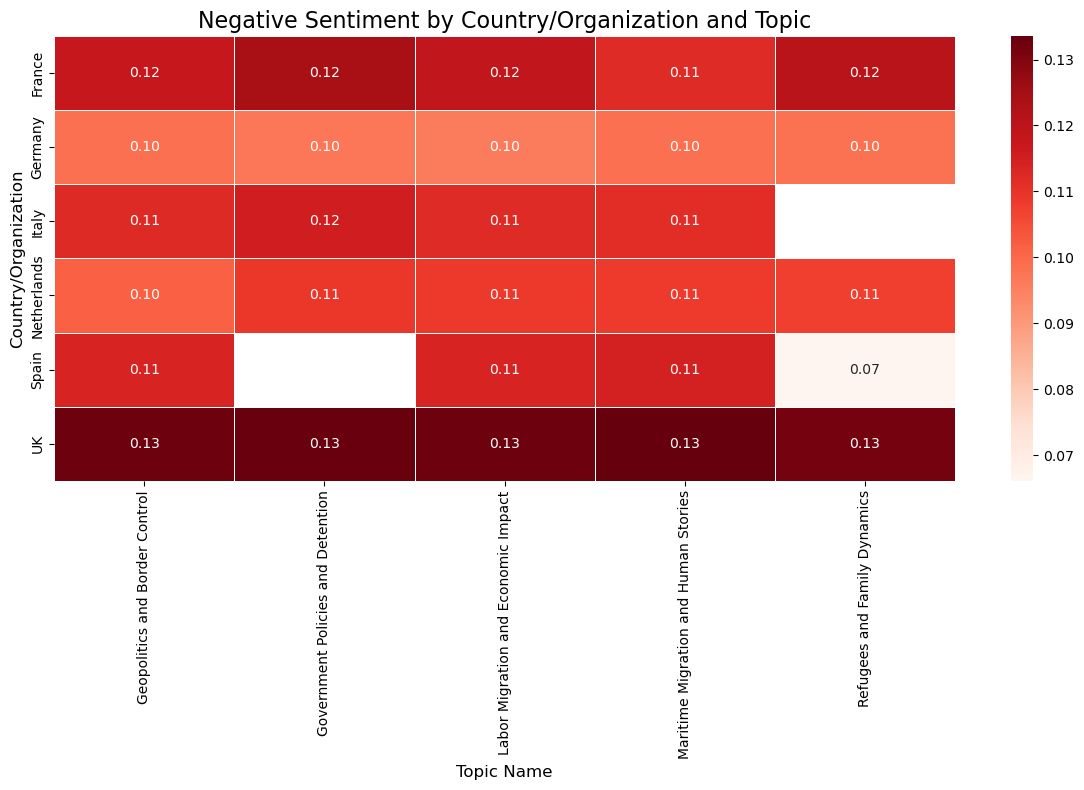

In [23]:
# Filter for specific countries
countries_of_interest = ['France', 'Germany', 'Italy', 'Netherlands', 'Spain', 'UK']
filtered_df = merged_df[merged_df['Country/Organization'].isin(countries_of_interest)]

# Group by Country/Organization and Topic_Name, calculate mean sentiment scores
geo_analysis = filtered_df.groupby(['Country/Organization', 'Topic_Name']).agg({
    'negative_score': 'mean',
    'positive_score': 'mean',
    'neutral_score': 'mean'
}).reset_index()

# Pivot the data for heatmap plotting
geo_pivot = geo_analysis.pivot_table(
    index='Country/Organization', columns='Topic_Name', values='negative_score'
)

# Plot heatmap for negative sentiment across regions and topics
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(geo_pivot, annot=True, cmap="Reds", fmt=".2f", linewidths=0.5)
plt.title("Negative Sentiment by Country/Organization and Topic", fontsize=16)
plt.xlabel("Topic Name", fontsize=12)
plt.ylabel("Country/Organization", fontsize=12)
plt.tight_layout()
plt.savefig("/Users/henryasiamah/Desktop/Visuals/TM_sentScores_country_organization33")
plt.show()
plt.close()

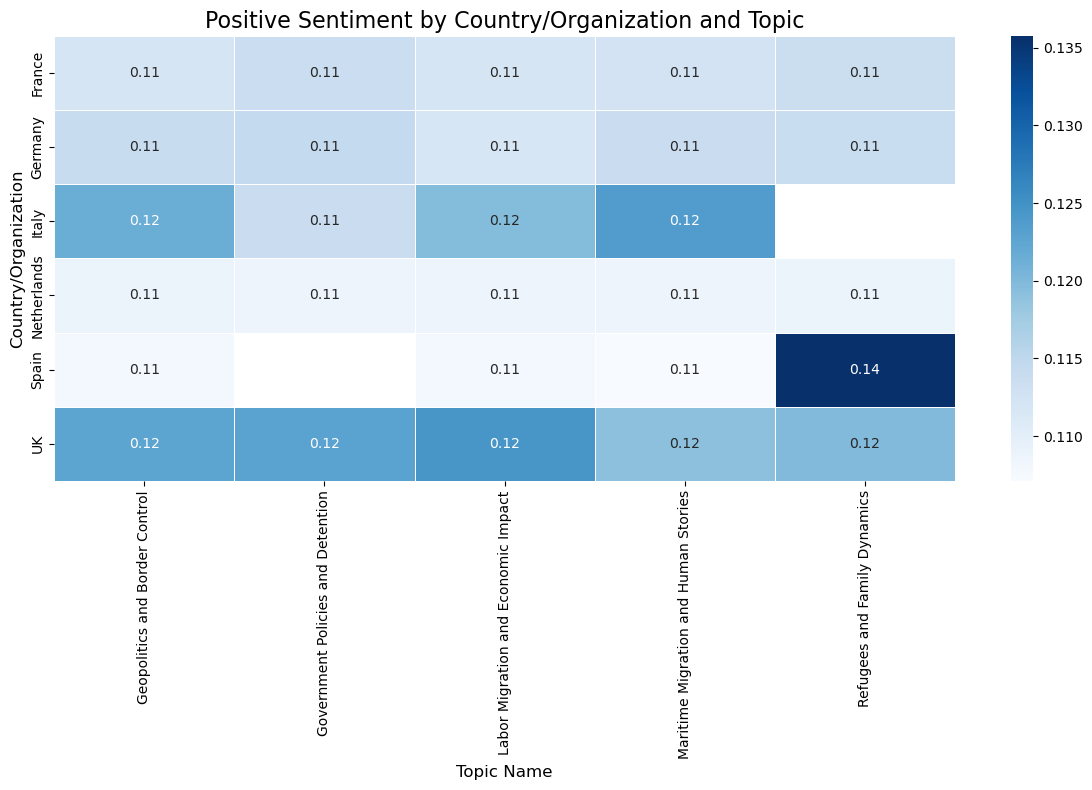

In [24]:
# Filter for specific countries
countries_of_interest = ['France', 'Germany', 'Italy', 'Netherlands', 'Spain', 'UK']
filtered_df = merged_df[merged_df['Country/Organization'].isin(countries_of_interest)]

# Group by Country/Organization and Topic_Name, calculate mean sentiment scores
geo_analysis = filtered_df.groupby(['Country/Organization', 'Topic_Name']).agg({
    'negative_score': 'mean',
    'positive_score': 'mean',
    'neutral_score': 'mean'
}).reset_index()

# Pivot the data for heatmap plotting
geo_pivot = geo_analysis.pivot_table(
    index='Country/Organization', columns='Topic_Name', values='positive_score'
)

# Plot heatmap for negative sentiment across regions and topics
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(geo_pivot, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title("Positive Sentiment by Country/Organization and Topic", fontsize=16)
plt.xlabel("Topic Name", fontsize=12)
plt.ylabel("Country/Organization", fontsize=12)
plt.tight_layout()
plt.savefig("/Users/henryasiamah/Desktop/Visuals/TM_sentScores_country_organization_positive")
plt.show()
plt.close()

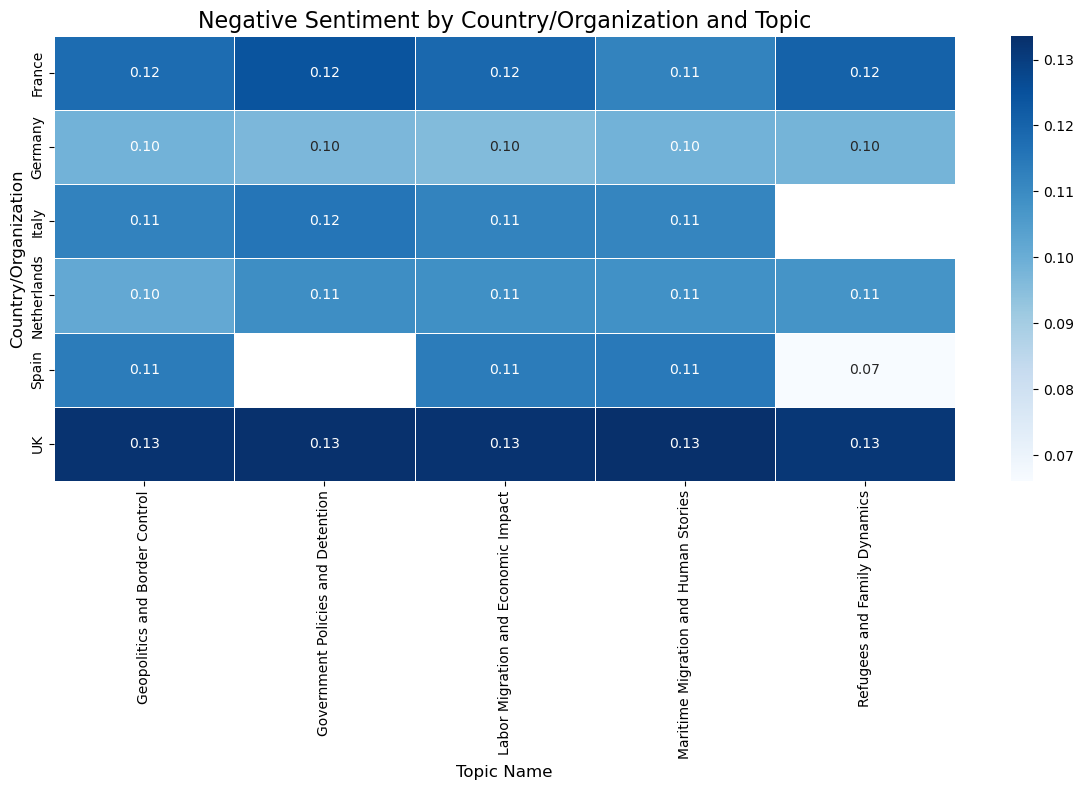

In [25]:
# Filter for specific countries
countries_of_interest = ['France', 'Germany', 'Italy', 'Netherlands', 'Spain', 'UK']
filtered_df = merged_df[merged_df['Country/Organization'].isin(countries_of_interest)]

# Group by Country/Organization and Topic_Name, calculate mean sentiment scores
geo_analysis = filtered_df.groupby(['Country/Organization', 'Topic_Name']).agg({
    'negative_score': 'mean',
    'positive_score': 'mean',
    'neutral_score': 'mean'
}).reset_index()

# Pivot the data for heatmap plotting
geo_pivot = geo_analysis.pivot_table(
    index='Country/Organization', columns='Topic_Name', values='negative_score'
)

# Plot heatmap for negative sentiment across regions and topics
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(geo_pivot, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title("Negative Sentiment by Country/Organization and Topic", fontsize=16)
plt.xlabel("Topic Name", fontsize=12)
plt.ylabel("Country/Organization", fontsize=12)
plt.tight_layout()
#plt.savefig("/Users/henryasiamah/Desktop/Visuals/BluesTM_sentScores_country_organization33")
plt.show()
plt.close()

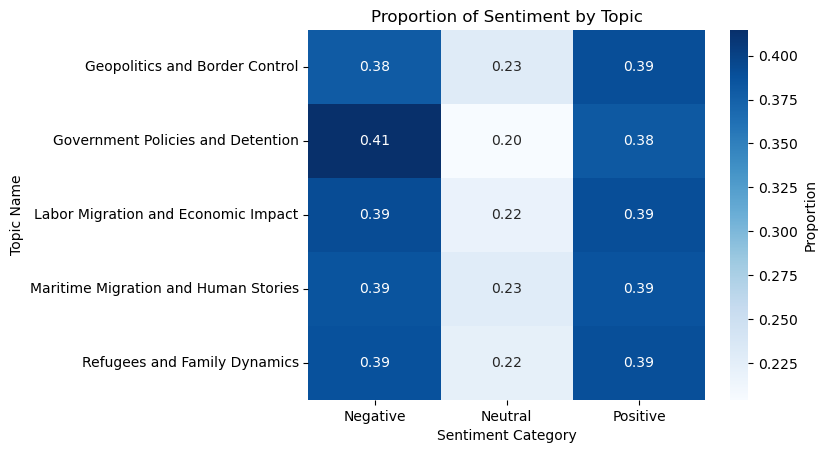

In [26]:
# Normalize counts to show proportions
pivot_normalized = pivot_table.div(pivot_table.sum(axis=1), axis=0)

# Plot the heatmap
sns.heatmap(pivot_normalized, annot=True, fmt=".2f", cmap='Blues', cbar_kws={'label': 'Proportion'})
plt.title('Proportion of Sentiment by Topic')
plt.ylabel('Topic Name')
plt.xlabel('Sentiment Category')
#plt.savefig("/Users/henryasiamah/Desktop/Visuals/TM_senti_Heatmap")
plt.show()
plt.close()